# Lineare Regression Projekt Aufgabe

In diesem Projekt wirst du die [Bike Sharing Challenge](https://www.kaggle.com/c/bike-sharing-demand/data) von Kaggle machen. Wir werden unsere Ergebnisse nicht zum Wettbewerb einreichen, aber du kannst dir Kaggle gerne genauer anschauen. 

In diesem Projekt geht es darum mehr Vertrauen mit der explorativen Datenanalyse zu gewinnen. Und darum festzustellen, dass manche Modelle nicht zu den vorliegenden Daten passen. Eine lineare Regression könnte hier nicht die beste Lösung sein.

**Bitte führe die nachfolgend beschriebenen Aufgaben aus.**

## Die Daten einlesen

Du kannst die Daten entweder von Kaggle herunterladen oder die .csv-Datei in den Kursunterlagen verwenden. Die Daten haben folgende Features:

* datetime - Datum und Uhrzeit
* season -  1 = Frühling, 2 = Sommer, 3 = Herbst, 4 = Winter 
* holiday - Ob es sich um einen Feiertag handelt
* workingday - Wenn es sich um einen regulären Arbeitstag handelt
* weather - 
    * 1: Klar, wenig bedeckt, etwas bedeckt
    * 2: Nebel und Wolken, Nebel und etwas Wolken, Nebel
    * 3: Leichter Schnee, Leichter Regen oder Wind
    * 4: Starker Regen, Hagel oder Sturm
* temp - Temperatur in Grad Celsius
* atemp - Gefühlte Temperatur
* humidity - Relative Luftfeuchtigkeit
* windspeed - Windgeschwindigkeit
* casual - Anzahl nicht-registrierter Mieter
* registered - Anzahl registrierter Mieter
* count - Anzahl der Mieten

**Lese die bikeshare.csv Datei ein und lade sie in einen Dataframe.**

In [1]:
bike <- read.csv('bikeshare.csv')

**Schaue dir den Head des Dataframe an.**

In [2]:
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


**Kannst du herausfinden, was hier unsere Zielvariable ist? Also die Variable, die wir vorhersagen möchten.**

In [3]:
# Count ist es, was wir vorhersagen möchten

## Explorative Datenanalyse

**Erstelle ein *Scatter Plot* von `count` vs. `temp`.**

*Hinweis: Ein guter Alpha-Wert hilft.*

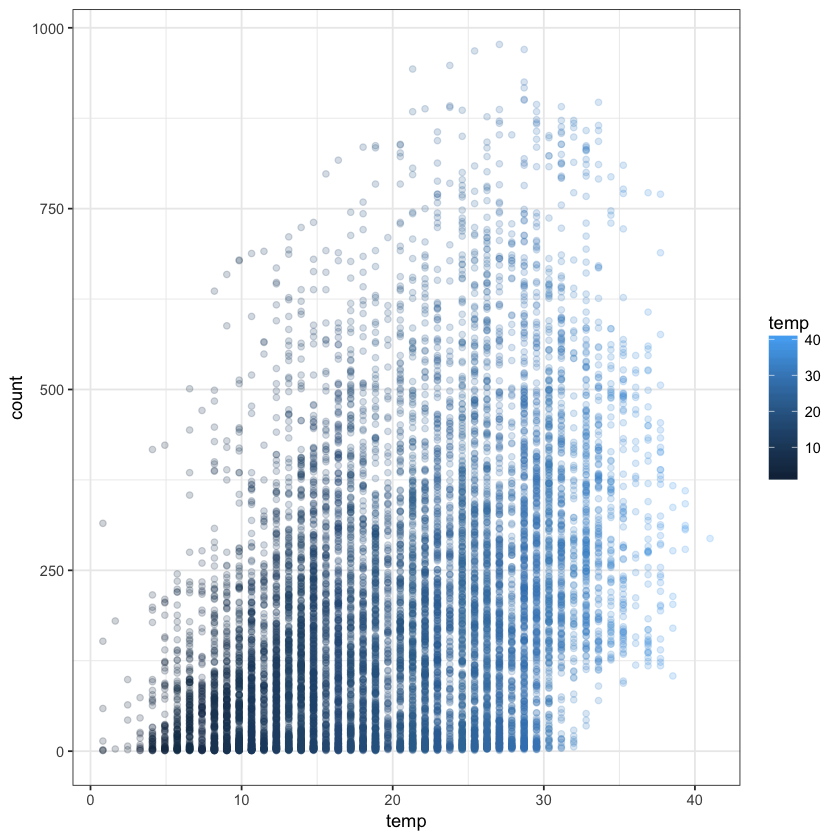

In [4]:
library(ggplot2)
ggplot(bike,aes(temp,count)) + geom_point(alpha=0.2, aes(color=temp)) + theme_bw()

**Erstelle ein weiteres *Scatter Plot*. Dieses Mal mit `count` vs. `datetime` mit einem Farbverlauf, der auf `temp` basiert.**

*Hinweis: Du musst die `datetime` Spalte zuerst in POSIXct umwandeln.*

In [5]:
bike$datetime <- as.POSIXct(bike$datetime)

Warning message in strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz):
“unknown timezone 'default/Europe/Berlin'”

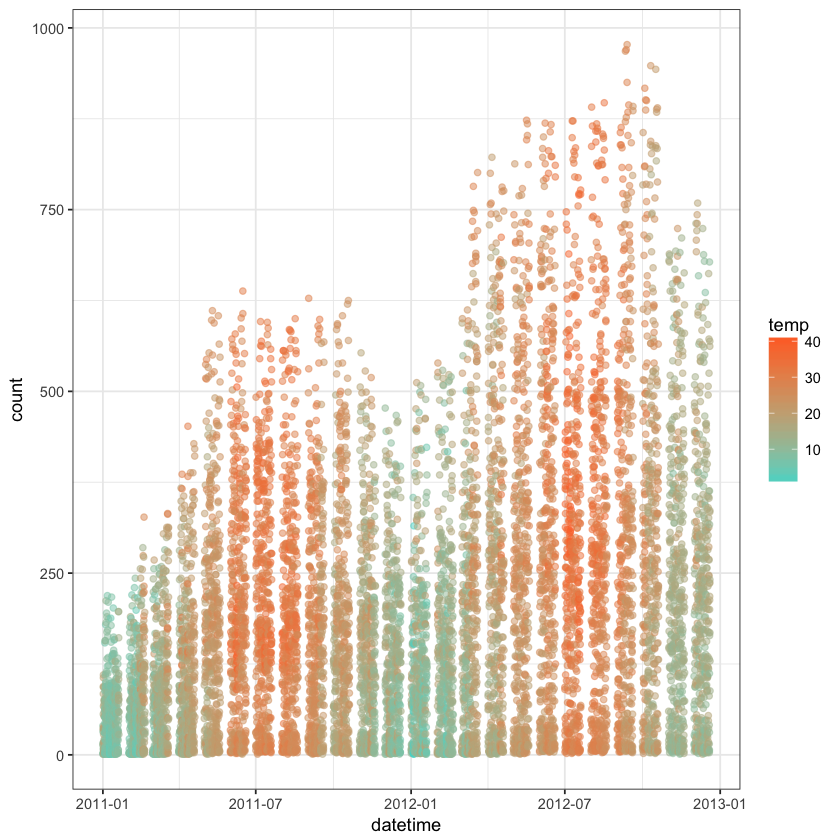

In [6]:
 ggplot(bike,aes(datetime,count)) + geom_point(aes(color=temp),alpha=0.5)  + scale_color_continuous(low='#55D8CE',high='#FF6E2E') +theme_bw() 

Hoffentlich sind dir dabei zwei Dinge aufgefallen: Es gibt eine Saisonalität für die Daten. Wir sehen Unterschiede zwischen Sommer und Winter. Zweitens gibt es einen positiven Trend, d.h. einen generellen Anstieg der Fahrradmieten.

**Das könnte ein Problem sein, wenn wir mit linearer Regression arbeiten, wenn die Daten nicht-linear sind.**

Hier ein kurzer Überblick von Vor- und Nachteilen der linearen Regression:

Pros:

* Einfach zu erlären
* Hoch interpretierbar
* Modell Training und Vorhersagen sind schnell
* Features benötigen keine Skalierung
* Kann mit einer kleinen Anzahl an Beobachtungen gut funktionieren
* Gut ergründet

Cons:

* Nimmt eine lineare Beziehung zwischen den Features und der Auswirkung an
* Die Leistung ist durch den hohen Bias (generell) nicht mit den besten Supervised Learning Modellen vergleichbar
* Kann Zusammenhänge zwischen Features nicht automatisch lernen

**Das sollten wir im Kopf behalten, wenn wir fortfahren. Wir können evtl. zu diesem Projekt zurückkehren, sobald wir weitere Tools kennengelernt haben.**
___
**Was ist die Korrelation zwischen `temp` und `count`?**

In [7]:
cor(bike[,c('temp','count')])

,temp,count
temp,1.0000000,0.3944536
count,0.3944536,1.0000000


**Untersuchen wir jetzt die `season` Daten. Erstelle ein *Boxplot* mit `count` auf der y-Achse und dann einer Box für jede Saison auf der x-Achse.**

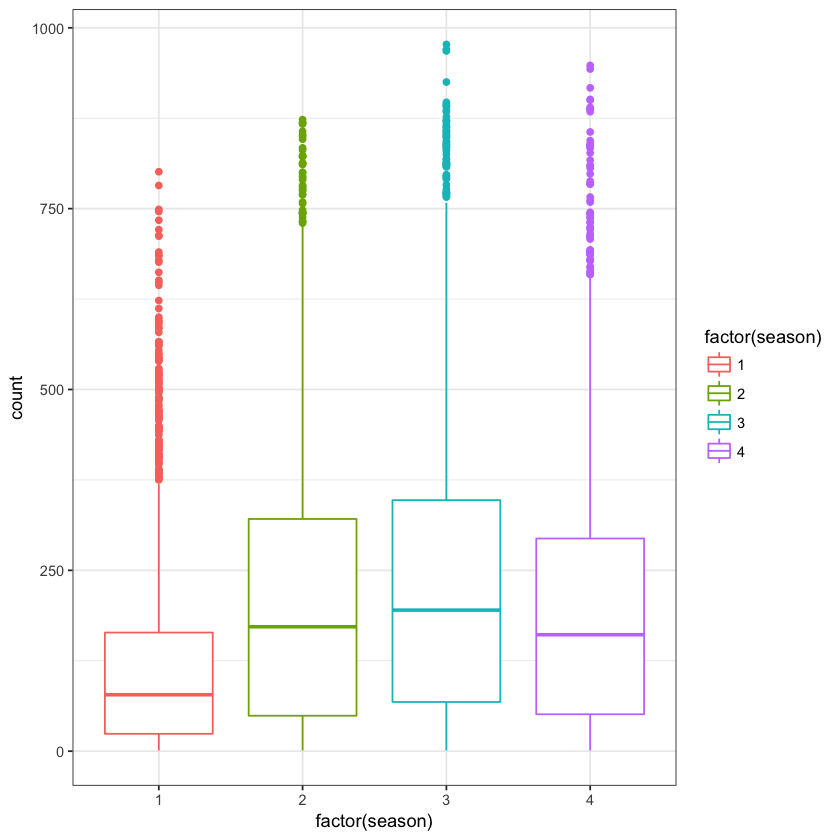

In [8]:
ggplot(bike,aes(factor(season),count)) + geom_boxplot(aes(color=factor(season))) +theme_bw()

**Achte darauf, was uns dies sagt:**

* Eine Linie kann eine nicht-lineare Beziehung nicht aufzeigen.
* Im Winter werden mehr Mieten getätigt als im Frühling.

**Wir kennen die Erklärung zu diesem Problem bereits: Das Wachstum der Mieten insgesamt. Es hat nichts mit den tatsächlichen Saisons zu tun.**

## Feature Engineering

Oft sind Fachwissen und viel Erfahrung nötig, um neue Features zu erstellen. Wir können hier einige neue Features aus `Datetime` erstellen.

**Erstelle eine `hour` Spalte, die die Stunde aus der `datetime` Spalte übernimmt.**

*Hinweis*:

    time.stamp <- bike$datetime[4]
    format(time.stamp, "%H")

In [9]:
bike$hour <- sapply(bike$datetime,function(x){format(x,"%H")})

In [10]:
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


**Erstelle jetzt ein *Scatterplot*, das `count` vs. `hour` anzeigt und einen Farbverlauf aufweist, der auf `temp` basiert. Verwende dazu nur die Daten, für die gilt: `workingday == 1`.**

*Optional:*

* Verwende `scale_color_gradientn(colors=c('color1',color2,etc..))` als weitere Layer, um nicht nur einen Farbverlauf von "hoch" zu "tief" zu erhalten, sondern über verschiedene Farben hinweg.
* Verwende `position=position_jitter(w=1, h=0)` innerhalb von geom_point() und sieh dir an, was es tut.

In [11]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



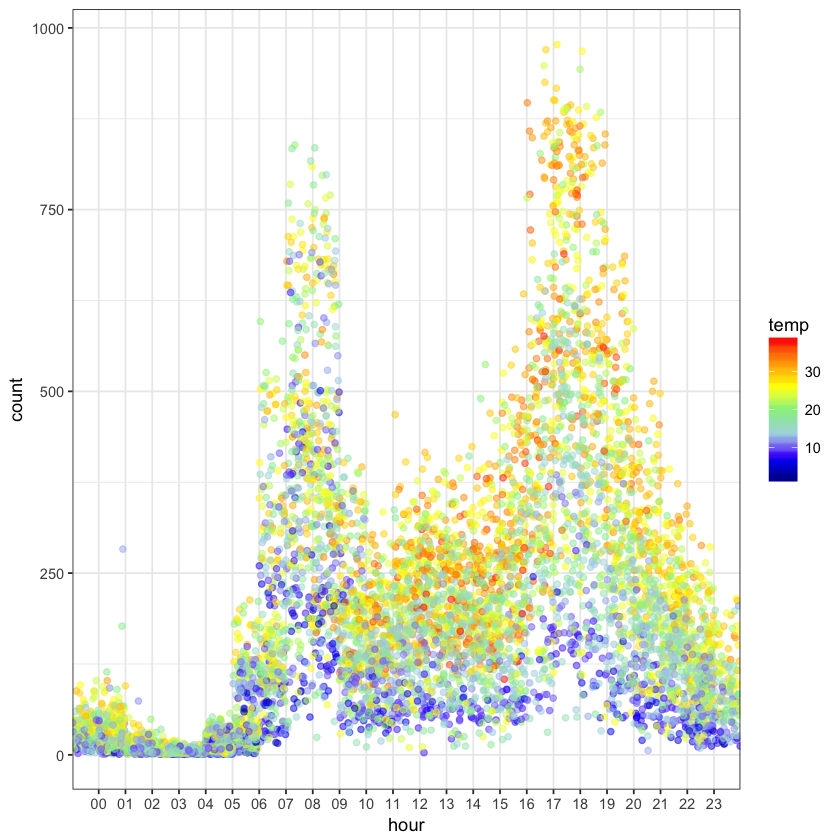

In [12]:
pl <- ggplot(filter(bike,workingday==1),aes(hour,count)) 
pl <- pl + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.5)
pl <- pl + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
pl + theme_bw()

**Erstelle jetzt das gleiche Plot für nicht-Arbeitstage.**

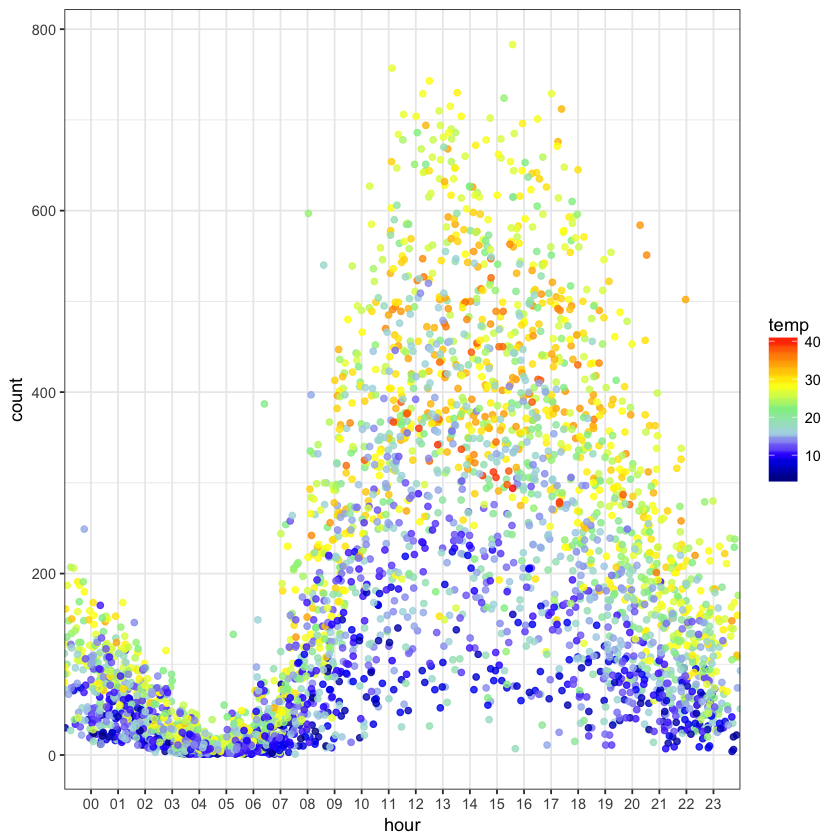

In [13]:
pl <- ggplot(filter(bike,workingday==0),aes(hour,count)) 
pl <- pl + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.8)
pl <- pl + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
pl + theme_bw()

Dir sollte aufgefallen sein, dass Wochentage ein Hoch am Morgen haben (~8 Uhr) und nach der Arbeit (~17 Uhr) und etwas Aktivität zur Mittagspause. Am Nicht-Arbeitstagen gibt es hingegen konstante Aktivität.

Wir können jetzt damit fortfahren, ein Modell aufzubauen und zunächst nur ein einziges Feature zu berücksichtigen.

## Ein Modell aufbauen

**Nutze `lm()`, um ein Modell aufzubauen, dass `count` vorhersagt, indem es `temp` nutzt. Es soll "temp.model" heißen.**

In [14]:
temp.model <- lm(count~temp,bike)

**Schaue dir die "Summary" zu dem Modell an.**

In [15]:
summary(temp.model)


Call:
lm(formula = count ~ temp, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0462     4.4394   1.362    0.173    
temp          9.1705     0.2048  44.783   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


Du solltest 6.0462 als Intercept erhalten haben und 9.17 als den Koeffizienten für `temp`. Wie lassen sich diese Werte interpretieren? *Du kannst Wikipedia-Artikel oder das ISLR-Buch lesen oder die vorherige Lektion zur linearen Regression heranziehen.*
__

### Interpretation des Intercept (β0):
* Ist der Wert für x=0
* Dementsprechend ist es die geschätzte Anzahl an Mieten bei einer Temperatur von 0 Grad Celsius
* *Hinweis: Es ist nicht immer sinnvoll den Intercept zu interpretieren*

### Interpretation des `temp` Koeffizienten (β1):
* Ist die Veränderung in y geteilt durch die Veränderung in x, d.h. die Steigung
* Wir können also sagen, dass ein Anstieg der Temperatur im 1 Grad Celsius mit einem Anstieg der Mieten um 9.17 Fahrräder assoziiert ist
* Diese Aussage soll keine Kausalität ausdrücken
* β1 wäre negativ, wenn ein Anstieg der Temperatur mit einer sinkenden Anzahl an Mieten einhergehen würde

**Wie viele Fahrrad Mieten würden wir vorhersagen, wenn die Temperatur 25 Grad Celsius ist?**

* 1: Die Werte nutzen, die wir eben interpretiert haben
* 2: Die `predict()` Funktion nutzen

Es sollten ca. 235.3 Fahrräder sein.

In [16]:
# Methode 1
6.0462 + 9.17*25

[1] 235.2962

In [17]:
# Methode 2
temp.test <- data.frame(temp=c(25))
predict(temp.model,temp.test)

1 
235.3097

** Nutze `sapply()` und `as.numeric`, um die `hour` Spalte in numerische Werte umzuwandeln.**

In [18]:
bike$hour <- sapply(bike$hour,as.numeric)

**Jetzt erstelle ein neues Modell, das versucht `count` anhand der folgenden Feautres vorherzusagen:**

* season
* holiday
* workingday
* weather
* temp
* humidity
* windspeed
* hour (factor)

*Hinweis: Es geht im Kurs ja auch um die Arbeit als Data Scientist. Und als solcher muss man häufig Lösungen finden, die man nicht auswendig parat hat. Dabei sind Google und StackOverflow tolle Quellen. Evtl. kannst du so einen Weg finden, um nicht alle Variablen in die lm Funktion übergeben zu müssen.*

In [19]:
model <- lm(count ~ . -casual - registered -datetime -atemp,bike )

**Schaue dir die "Summary" des Modells an.**

In [20]:
summary(model)


Call:
lm(formula = count ~ . - casual - registered - datetime - atemp, 
    data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-value: < 2.2e-16


**Hat das Modell gut auf den Trainingsdaten funktioniert? Was hältst du von einer linearen Regression für diese Daten?**

Ein lineares Regressionsmodell wie das, welches wir gewählt haben, verwendet OLS. Es wird nicht in der Lage sein die Saisonalität zu berücksichtigen, wodurch es einen Hang zum Winter entwickelt, anstatt zu erkennen, dass es sich um allgemeines Wachstum handelt. Später können wir uns anschauen, ob andere Modelle besser für diese Art von Daten sind.

**Dir sollte aufgefallen sein, dass diese Art von Modell nicht gut mit saisonalen Daten und Zeitreihen funktioniert. Wir brauchen ein Modell, das Rücksicht darauf nehmen kann. Wenn du dich dafür bereits jetzt interessiert kannst du mehr über "Regression Forests" lesen. Für den Moment können wir das einfach als lehrreiche Erfahrung verinnerlichen und mit der logistischen Regression weitermachen.**

# Gut gemacht!